# First visualization
## Which song has higher chance of bigger hit based on the weeks on rank (track)

Using multiple linear regression, find the relatiship between each features and the track

In [1]:
# import necessary library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# open csv file that will be used
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

Simple data statistic and visualization

In [3]:
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,77,50,20,2016-07-23,2016-02-02,"Canada,Pop",NaN
1,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,66,50,19,2016-07-16,2016-02-02,"Canada,Pop",NaN
2,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,58,50,18,2016-07-09,2016-02-02,"Canada,Pop",NaN
3,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,52,50,17,2016-07-02,2016-02-02,"Canada,Pop",NaN
4,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,51,50,16,2016-06-25,2016-02-02,"Canada,Pop",NaN


In [4]:
df_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000
mean,0.635331,0.681912,5.384355,-5.869377,0.677534,0.095635,0.162999,0.014599,0.177758,0.488973,122.654291,223875.016624,3.985109,39.104449,10.024851,0.948928,48.985832,32.693091,12.695148
std,0.139806,0.168585,3.598121,2.286930,0.467425,0.095837,0.208790,0.097527,0.138516,0.215521,28.686177,43680.182897,0.225080,17.666684,2.443693,0.220147,28.785245,27.965312,10.428529
min,0.121000,0.021900,0.000000,-32.248000,0.000000,0.022500,0.000006,0.000000,0.016700,0.022400,48.718000,59387.000000,1.000000,9.391840,3.000000,0.000000,1.000000,0.000000,0.000000
25%,0.548000,0.571000,2.000000,-6.890000,0.000000,0.037200,0.020300,0.000000,0.095300,0.329000,99.836000,199320.000000,4.000000,27.513340,8.000000,1.000000,24.000000,6.000000,5.000000
50%,0.642000,0.705000,6.000000,-5.517500,1.000000,0.053300,0.073200,0.000000,0.121000,0.482000,122.050000,219080.000000,4.000000,34.722060,10.000000,1.000000,48.000000,27.000000,11.000000
75%,0.734000,0.810000,8.000000,-4.402000,1.000000,0.109000,0.221000,0.000013,0.215000,0.648000,141.514000,240166.000000,4.000000,45.763930,11.000000,1.000000,74.000000,55.000000,18.000000
max,0.980000,0.991000,11.000000,-0.716000,1.000000,0.733000,0.992000,0.973000,0.979000,0.976000,208.067000,726947.000000,5.000000,213.154990,24.000000,1.000000,100.000000,100.000000,87.000000


In [5]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             52514 non-null  object 
 1   artist            52514 non-null  object 
 2   danceability      52514 non-null  float64
 3   energy            52514 non-null  float64
 4   key               52514 non-null  int64  
 5   loudness          52514 non-null  float64
 6   mode              52514 non-null  int64  
 7   speechiness       52514 non-null  float64
 8   acousticness      52514 non-null  float64
 9   instrumentalness  52514 non-null  float64
 10  liveness          52514 non-null  float64
 11  valence           52514 non-null  float64
 12  tempo             52514 non-null  float64
 13  duration_ms       52514 non-null  int64  
 14  time_signature    52514 non-null  int64  
 15  chorus_hit        52514 non-null  float64
 16  sections          52514 non-null  int64 

visual and statistics from 2000s to 2010

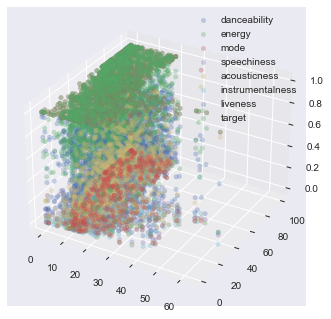

In [6]:
df_00_samp = df_00.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_00_samp['Weeks.on.chart'], df_00_samp['Weekly.rank'], 
               df_00_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [7]:
X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

In [8]:
model01 = sm.OLS(y0, X0).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.093e+31
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        14:49:17   Log-Likelihood:                      1.4293e+06
No. Observations:               50650   AIC:                                 -2.859e+06
Df Residuals:                   50631   BIC:                                 -2.858e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      5.204e-16   5.19e-15      0.100      0.920   -9.65e-15    1.07e-14
energy           -2.937e-14    5.4e-15     -5.434      0.000      -4e-14   -1.88e-14
key                2.28e-15   1.71e-16     13.350      0.000    1.95e-15    2.62e-15
loudness          8.084e-16   3.76e-16      2.148      0.032    7.08e-17    1.55e-15
mode              1.232e-14   1.33e-15      9.292      0.000    9.72e-15    1.49e-14
speechiness       8.155e-14   6.65e-15     12.266      0.000    6.85e-14    9.46e-14
acousticness     -5.704e-14   3.71e-15    -15.394      0.000   -6.43e-14   -4.98e-14
instrumentalness  5.464e-14   8.34e-15      6.553      0.000    3.83e-14     7.1e-14
liveness          1.364e-14   4.61e-15      2.960      0.003    4.61e-15    2.27e-14
valence          -2.709e-14   3.47e-15     -7.810      0.000   -3.39e-14   -2.03e-14
tempo            -1.775e-16    2.1e-17     -8.444      0.000   -2.19e-16   -1.36e-16
duration_ms      -3.981e-19    1.8e-20    -22.152      0.000   -4.33e-19   -3.63e-19
time_signature   -1.663e-14   1.81e-15     -9.212      0.000   -2.02e-14   -1.31e-14
chorus_hit        2.881e-16   3.66e-17      7.871      0.000    2.16e-16     3.6e-16
sections         -5.803e-16   3.49e-16     -1.664      0.096   -1.26e-15    1.03e-16
target            5.579e-14   3.45e-15     16.164      0.000     4.9e-14    6.26e-14
Weekly.rank        3.33e-16   2.81e-17     11.837      0.000    2.78e-16    3.88e-16
Peak.position     2.759e-17   3.04e-17      0.909      0.363   -3.19e-17    8.71e-17
Weeks.on.chart       1.0000   7.46e-17   1.34e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    18935.134   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264044.096
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                      13.823   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key, Speechiness, liveness, valence, and sections does not have any important relationship with weeks on chart

repeate with Intercept

In [9]:
predictors = sm.add_constant(X0)
predictors

,const,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,95,65,17
1,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,85,65,16
2,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,79,65,15
3,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,83,65,14
4,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,80,65,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50645,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,70,5
50646,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,70,70,4
50647,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,76,3
50648,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,79,79,2


In [10]:
model02 = sm.OLS(y0, predictors).fit()
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.058e+30
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:49:18   Log-Likelihood:             1.3961e+06
No. Observations:               50650   AIC:                        -2.792e+06
Df Residuals:                   50630   BIC:                        -2.792e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.052e-13   2.56e-14     -8.012      0.000   -2.55e-13   -1.55e-13
danceability      3.045e-14   1.04e-14      2.937      0.003    1.01e-14    5.08e-14
energy            2.165e-14   1.15e-14      1.889      0.059   -8.12e-16    4.41e-14
key              -1.312e-15    3.3e-16     -3.976      0.000   -1.96e-15   -6.65e-16
loudness          -4.03e-15   7.77e-16     -5.189      0.000   -5.55e-15   -2.51e-15
mode              1.631e-16   2.57e-15      0.063      0.949   -4.88e-15     5.2e-15
speechiness       5.759e-14   1.28e-14      4.490      0.000    3.25e-14    8.27e-14
acousticness     -1.885e-14   7.32e-15     -2.573      0.010   -3.32e-14   -4.49e-15
instrumentalness  1.274e-14   1.61e-14      0.793      0.428   -1.88e-14    4.42e-14
liveness           1.05e-14   8.88e-15      1.182      0.237   -6.91e-15    2.79e-14
valence          -6.681e-15   6.72e-15     -0.994      0.320   -1.99e-14    6.49e-15
tempo             1.039e-16   4.24e-17      2.453      0.014    2.09e-17    1.87e-16
duration_ms      -3.176e-19   3.51e-20     -9.045      0.000   -3.86e-19   -2.49e-19
time_signature    1.266e-14   4.77e-15      2.654      0.008    3.31e-15     2.2e-14
chorus_hit       -3.444e-16   7.08e-17     -4.861      0.000   -4.83e-16   -2.06e-16
sections         -2.191e-15   6.72e-16     -3.259      0.001   -3.51e-15   -8.73e-16
target            1.272e-14   6.92e-15      1.837      0.066   -8.52e-16    2.63e-14
Weekly.rank      -1.149e-16   5.43e-17     -2.116      0.034   -2.21e-16   -8.47e-18
Peak.position    -3.717e-16   5.85e-17     -6.352      0.000   -4.86e-16   -2.57e-16
Weeks.on.chart       1.0000   1.44e-16   6.92e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     9354.460   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30438.706
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       6.301   Cond. No.                     5.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

standard scaling

In [11]:
standardScale = (X0-np.mean(X0)) / np.std(X0)
standardScale.dropna(axis='columns', inplace = True)

In [12]:
X03 = sm.add_constant(standardScale)
model03 = sm.OLS(y0, X03).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.089e+32
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:49:18   Log-Likelihood:             1.5256e+06
No. Observations:               50650   AIC:                        -3.051e+06
Df Residuals:                   50630   BIC:                        -3.051e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.5140   8.92e-17   1.29e+17      0.000      11.514      11.514
danceability     -2.134e-16    1.2e-16     -1.782      0.075   -4.48e-16    2.13e-17
energy             8.76e-17   1.47e-16      0.596      0.551   -2.01e-16    3.76e-16
key               3.811e-15   9.03e-17     42.201      0.000    3.63e-15    3.99e-15
loudness         -5.516e-16   1.26e-16     -4.371      0.000   -7.99e-16   -3.04e-16
mode             -3.168e-15   9.32e-17    -33.989      0.000   -3.35e-15   -2.98e-15
speechiness       4.621e-15   9.58e-17     48.240      0.000    4.43e-15    4.81e-15
acousticness      2.633e-15   1.07e-16     24.617      0.000    2.42e-15    2.84e-15
instrumentalness   1.22e-15   9.41e-17     12.954      0.000    1.03e-15     1.4e-15
liveness         -1.086e-15    9.2e-17    -11.803      0.000   -1.27e-15   -9.06e-16
valence          -5.547e-15   1.17e-16    -47.226      0.000   -5.78e-15   -5.32e-15
tempo            -3.275e-15   9.69e-17    -33.800      0.000   -3.46e-15   -3.08e-15
duration_ms       1.856e-15   1.27e-16     14.657      0.000    1.61e-15     2.1e-15
time_signature    -3.53e-15   9.05e-17    -39.024      0.000   -3.71e-15   -3.35e-15
chorus_hit        1.593e-15   9.89e-17     16.104      0.000     1.4e-15    1.79e-15
sections          5.411e-15   1.29e-16     41.970      0.000    5.16e-15    5.66e-15
target            1.628e-15   9.38e-17     17.362      0.000    1.44e-15    1.81e-15
Weekly.rank       9.263e-16   1.21e-16      7.637      0.000    6.89e-16    1.16e-15
Peak.position     8.396e-16   1.25e-16      6.704      0.000    5.94e-16    1.09e-15
Weeks.on.chart       8.7670   9.82e-17   8.93e+16      0.000       8.767       8.767
==============================================================================
Omnibus:                     1693.628   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2661.880
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       3.925   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 # --------------------------------------------------------------------------------

In [13]:
# same thing but using StandardScaler 
# (more accurate, but harder to read, no significant difference, just use previouse table)

sc = StandardScaler()

X0_scaled = sc.fit_transform(X0)

X04 = sm.add_constant(X0_scaled)
model04 = sm.OLS(y0, X04).fit()
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.089e+32
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:49:18   Log-Likelihood:             1.5256e+06
No. Observations:               50650   AIC:                        -3.051e+06
Df Residuals:                   50630   BIC:                        -3.051e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5140   8.92e-17   1.29e+17      0.000      11.514      11.514
x1         -2.134e-16    1.2e-16     -1.782      0.075   -4.48e-16    2.13e-17
x2           8.76e-17   1.47e-16      0.596      0.551   -2.01e-16    3.76e-16
x3          3.811e-15   9.03e-17     42.201      0.000    3.63e-15    3.99e-15
x4         -5.516e-16   1.26e-16     -4.371      0.000   -7.99e-16   -3.04e-16
x5         -3.168e-15   9.32e-17    -33.989      0.000   -3.35e-15   -2.98e-15
x6          4.621e-15   9.58e-17     48.240      0.000    4.43e-15    4.81e-15
x7          2.633e-15   1.07e-16     24.617      0.000    2.42e-15    2.84e-15
x8           1.22e-15   9.41e-17     12.954      0.000    1.03e-15     1.4e-15
x9         -1.086e-15    9.2e-17    -11.803      0.000   -1.27e-15   -9.06e-16
x10        -5.547e-15   1.17e-16    -47.226      0.000   -5.78e-15   -5.32e-15
x11        -3.275e-15   9.69e-17    -33.800      0.000   -3.46e-15   -3.08e-15
x12         1.856e-15   1.27e-16     14.657      0.000    1.61e-15     2.1e-15
x13         -3.53e-15   9.05e-17    -39.024      0.000   -3.71e-15   -3.35e-15
x14         1.593e-15   9.89e-17     16.104      0.000     1.4e-15    1.79e-15
x15         5.411e-15   1.29e-16     41.970      0.000    5.16e-15    5.66e-15
x16         1.628e-15   9.38e-17     17.362      0.000    1.44e-15    1.81e-15
x17         9.263e-16   1.21e-16      7.637      0.000    6.89e-16    1.16e-15
x18         8.396e-16   1.25e-16      6.704      0.000    5.94e-16    1.09e-15
x19            8.7670   9.82e-17   8.93e+16      0.000       8.767       8.767
==============================================================================
Omnibus:                     1693.628   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2661.880
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       3.925   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

based on coefficent,           <br>
key	3.811e-15                  <br>
speechiness	4.621e-15          <br>
acousticness	2.633e-15      <br>
instrumentalness	1.22e-15   <br>
duration_ms	1.856e-15          <br>
chorus_hit	1.593e-15          <br>
sections	5.411e-15          <br>
Weekly.rank	9.263e-16	       <br>
Peak.position	8.396e-16      <br>
Weeks.on.chart	8.7670         <br>

have a stronger relationship to weeks on chart

visual and statistics of 2010s to 2020

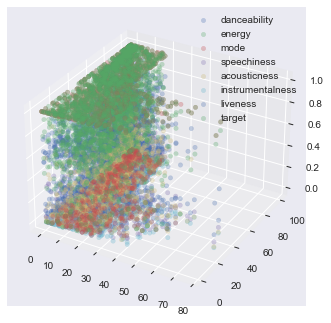

In [14]:
df_10_samp = df_10.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_10_samp['Weeks.on.chart'], df_10_samp['Weekly.rank'], 
               df_10_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [15]:
X1, y = df_10.select_dtypes(exclude=['object']), df_10['Weeks.on.chart']

In [16]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.490e+32
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        14:49:19   Log-Likelihood:                      1.5642e+06
No. Observations:               52514   AIC:                                 -3.128e+06
Df Residuals:                   52495   BIC:                                 -3.128e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      2.331e-14   9.87e-16     23.617      0.000    2.14e-14    2.52e-14
energy            1.783e-14    1.2e-15     14.849      0.000    1.55e-14    2.02e-14
key               2.645e-16   3.42e-17      7.738      0.000    1.98e-16    3.32e-16
loudness         -9.442e-16   7.95e-17    -11.872      0.000    -1.1e-15   -7.88e-16
mode              -1.54e-15   2.69e-16     -5.726      0.000   -2.07e-15   -1.01e-15
speechiness      -3.247e-15   1.37e-15     -2.375      0.018   -5.93e-15   -5.68e-16
acousticness       2.04e-14   6.93e-16     29.430      0.000     1.9e-14    2.18e-14
instrumentalness -1.445e-13   1.45e-15    -99.677      0.000   -1.47e-13   -1.42e-13
liveness          1.898e-14   9.11e-16     20.849      0.000    1.72e-14    2.08e-14
valence          -8.677e-15   6.83e-16    -12.700      0.000      -1e-14   -7.34e-15
tempo             3.239e-16   4.37e-18     74.124      0.000    3.15e-16    3.32e-16
duration_ms      -5.326e-20   3.92e-21    -13.573      0.000   -6.09e-20   -4.56e-20
time_signature    1.616e-14   3.78e-16     42.769      0.000    1.54e-14    1.69e-14
chorus_hit       -1.479e-16   7.72e-18    -19.147      0.000   -1.63e-16   -1.33e-16
sections         -1.409e-15   7.08e-17    -19.901      0.000   -1.55e-15   -1.27e-15
target           -7.536e-14   6.04e-16   -124.858      0.000   -7.65e-14   -7.42e-14
Weekly.rank      -2.203e-16   5.93e-18    -37.155      0.000   -2.32e-16   -2.09e-16
Peak.position    -1.548e-16   6.15e-18    -25.191      0.000   -1.67e-16   -1.43e-16
Weeks.on.chart       1.0000    1.3e-17    7.7e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     4794.052   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34726.975
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       6.983   Cond. No.                     2.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key, Speechiness, liveness, valence, and sections does not have any important relationship with weeks on chart

repeate with Intercep

In [17]:
predictors = sm.add_constant(X1)
predictors

,const,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,77,50,20
1,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,66,50,19
2,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,58,50,18
3,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,52,50,17
4,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,51,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52509,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,58,46,5
52510,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,74,46,4
52511,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,46,46,3
52512,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,53,53,2


In [18]:
model2 = sm.OLS(y, predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.058e+28
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:49:19   Log-Likelihood:             1.3385e+06
No. Observations:               52514   AIC:                        -2.677e+06
Df Residuals:                   52494   BIC:                        -2.677e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.194e-12   2.06e-13    -10.660      0.000    -2.6e-12   -1.79e-12
danceability      1.076e-14   7.51e-14      0.143      0.886   -1.37e-13    1.58e-13
energy            1.375e-13   9.45e-14      1.454      0.146   -4.78e-14    3.23e-13
key               4.387e-15   2.53e-15      1.733      0.083   -5.74e-16    9.35e-15
loudness         -4.865e-15   6.21e-15     -0.784      0.433    -1.7e-14     7.3e-15
mode              2.965e-14   1.99e-14      1.492      0.136   -9.29e-15    6.86e-14
speechiness       5.745e-14   1.01e-13      0.569      0.569   -1.41e-13    2.55e-13
acousticness      6.919e-14   5.21e-14      1.327      0.185    -3.3e-14    1.71e-13
instrumentalness -5.995e-14   1.07e-13     -0.562      0.574   -2.69e-13    1.49e-13
liveness           4.77e-14   6.71e-14      0.711      0.477   -8.38e-14    1.79e-13
valence          -4.725e-14   5.03e-14     -0.939      0.348   -1.46e-13    5.14e-14
tempo             2.584e-16   3.29e-16      0.785      0.432   -3.87e-16    9.03e-16
duration_ms      -4.348e-19   2.91e-19     -1.492      0.136   -1.01e-18    1.36e-19
time_signature    1.011e-14   4.08e-14      0.248      0.804   -6.99e-14    9.01e-14
chorus_hit       -3.918e-16   5.73e-16     -0.683      0.495   -1.52e-15    7.32e-16
sections         -4.396e-15   5.23e-15     -0.840      0.401   -1.46e-14    5.86e-15
target            2.782e-14   4.53e-14      0.614      0.539    -6.1e-14    1.17e-13
Weekly.rank      -4.753e-16   4.38e-16     -1.086      0.277   -1.33e-15    3.82e-16
Peak.position     1.679e-16   4.52e-16      0.371      0.711   -7.19e-16    1.05e-15
Weeks.on.chart       1.0000   9.61e-16   1.04e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3915.909   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16072.837
Skew:                           0.274   Prob(JB):                         0.00
Kurtosis:                       5.654   Cond. No.                     5.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

standard scaling

In [19]:
standardScale = (X1-np.mean(X1)) / np.std(X1)

In [20]:
standardScale.dropna(axis='columns', inplace = True)

In [21]:
X3 = sm.add_constant(standardScale)
model3 = sm.OLS(y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.109e+30
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:49:19   Log-Likelihood:             1.4108e+06
No. Observations:               52514   AIC:                        -2.822e+06
Df Residuals:                   52494   BIC:                        -2.821e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.6951   2.27e-15   5.59e+15      0.000      12.695      12.695
danceability       1.06e-15   2.65e-15      0.400      0.689   -4.13e-15    6.25e-15
energy           -1.181e-14   4.02e-15     -2.937      0.003   -1.97e-14   -3.93e-15
key              -2.654e-16    2.3e-15     -0.116      0.908   -4.77e-15    4.24e-15
loudness          8.301e-15   3.58e-15      2.318      0.020    1.28e-15    1.53e-14
mode              3.886e-16   2.34e-15      0.166      0.868    -4.2e-15    4.98e-15
speechiness      -5.924e-16   2.44e-15     -0.243      0.808   -5.38e-15    4.19e-15
acousticness     -6.335e-15   2.75e-15     -2.307      0.021   -1.17e-14   -9.53e-16
instrumentalness -7.841e-16   2.63e-15     -0.299      0.765   -5.93e-15    4.36e-15
liveness          2.305e-15   2.34e-15      0.983      0.325   -2.29e-15     6.9e-15
valence          -2.331e-15   2.74e-15     -0.852      0.394   -7.69e-15    3.03e-15
tempo            -2.545e-15   2.38e-15     -1.069      0.285   -7.21e-15    2.12e-15
duration_ms      -5.424e-15   3.21e-15     -1.689      0.091   -1.17e-14     8.7e-16
time_signature    4.984e-15   2.32e-15      2.151      0.032    4.42e-16    9.53e-15
chorus_hit        4.254e-15   2.56e-15      1.664      0.096   -7.56e-16    9.26e-15
sections          5.308e-16   3.22e-15      0.165      0.869   -5.79e-15    6.85e-15
target           -2.934e-14   2.52e-15    -11.650      0.000   -3.43e-14   -2.44e-14
Weekly.rank      -4.302e-16   3.18e-15     -0.135      0.892   -6.66e-15     5.8e-15
Peak.position     1.794e-15   3.19e-15      0.562      0.574   -4.46e-15    8.05e-15
Weeks.on.chart      10.4284   2.53e-15   4.13e+15      0.000      10.428      10.428
==============================================================================
Omnibus:                    10357.001   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27148.071
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       5.792   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

use standard scaler and linear regression to compare Z score

In [22]:
ss = StandardScaler()

X0_scaled = ss.fit_transform(X0)
X1_scaled = ss.fit_transform(X1)

In [23]:
X0_scaled

array([[-0.31566764, -1.43404766, -0.36361876, ...,  1.58273033,
         1.12293178,  0.62575406],
       [-0.31566764, -1.43404766, -0.36361876, ...,  1.23563644,
         1.12293178,  0.51168988],
       [-0.31566764, -1.43404766, -0.36361876, ...,  1.0273801 ,
         1.12293178,  0.3976257 ],
       ...,
       [-0.57751718,  0.19075068, -1.49686841, ...,  0.92325193,
         1.52132142, -0.97114444],
       [-0.57751718,  0.19075068, -1.49686841, ...,  1.0273801 ,
         1.62997314, -1.08520862],
       [-0.57751718,  0.19075068, -1.49686841, ...,  1.06208949,
        -1.23118879, -1.31333698]])

In [24]:
X0_scaled_1 = sm.add_constant(X0_scaled)
reg3 = LinearRegression().fit(X0_scaled_1, y0)

In [25]:
reg3.score(X0_scaled_1, y0)

1.0

In [26]:
reg4 = LinearRegression().fit(X0_scaled, y)

ValueError: Found input variables with inconsistent numbers of samples: [50650, 52514]

In [ ]:
print(f"""
X0 : {X0.shape}
X0 scaled: {X0_scaled_1.shape}
y0 : {y0.shape}
y  : {y.shape}
X3: {X3.shape}
""")

In [11]:
X3, y3 = df_00.select_dtypes(exclude=['object']), df_00['Weekly.rank']
model01 = sm.OLS(y3, X3).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Weekly.rank   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.785e+32
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:29:09   Log-Likelihood:                      1.4445e+06
No. Observations:               50650   AIC:                                 -2.889e+06
Df Residuals:                   50631   BIC:                                 -2.889e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      3.995e-13   3.85e-15    103.852      0.000    3.92e-13    4.07e-13
energy           -3.872e-13   4.01e-15    -96.622      0.000   -3.95e-13   -3.79e-13
key               2.999e-15   1.27e-16     23.678      0.000    2.75e-15    3.25e-15
loudness          7.272e-15   2.79e-16     26.060      0.000    6.73e-15    7.82e-15
mode              6.307e-14   9.83e-16     64.139      0.000    6.11e-14     6.5e-14
speechiness       3.712e-13   4.93e-15     75.296      0.000    3.62e-13    3.81e-13
acousticness     -1.231e-13   2.75e-15    -44.818      0.000   -1.29e-13   -1.18e-13
instrumentalness  8.027e-14   6.18e-15     12.984      0.000    6.82e-14    9.24e-14
liveness          5.007e-14   3.42e-15     14.651      0.000    4.34e-14    5.68e-14
valence          -1.665e-13   2.57e-15    -64.752      0.000   -1.72e-13   -1.61e-13
tempo            -7.242e-17   1.56e-17     -4.645      0.000   -1.03e-16   -4.19e-17
duration_ms       1.921e-19   1.33e-20     14.415      0.000    1.66e-19    2.18e-19
time_signature   -8.896e-15   1.34e-15     -6.645      0.000   -1.15e-14   -6.27e-15
chorus_hit        5.889e-16   2.71e-17     21.697      0.000    5.36e-16    6.42e-16
sections         -6.622e-15   2.59e-16    -25.612      0.000   -7.13e-15   -6.12e-15
target            1.064e-13   2.56e-15     41.587      0.000    1.01e-13    1.11e-13
Weekly.rank          1.0000   2.09e-17   4.79e+16      0.000       1.000       1.000
Peak.position    -5.204e-17   2.25e-17     -2.312      0.021   -9.62e-17   -7.92e-18
Weeks.on.chart    5.898e-16   5.53e-17     10.662      0.000    4.81e-16    6.98e-16
==============================================================================
Omnibus:                      147.539   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.887
Skew:                          -0.125   Prob(JB):                     2.83e-33
Kurtosis:                       3.092   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
standardScale = (X3-np.mean(X3)) / np.std(X3)

standardScale.dropna(axis='columns', inplace = True)

X4 = sm.add_constant(standardScale)

model4 = sm.OLS(y3, X4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weekly.rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.431e+30
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:29:14   Log-Likelihood:             1.3388e+06
No. Observations:               50650   AIC:                        -2.677e+06
Df Residuals:                   50630   BIC:                        -2.677e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               49.4005   3.57e-15   1.38e+16      0.000      49.401      49.401
danceability     -1.309e-14   4.79e-15     -2.732      0.006   -2.25e-14    -3.7e-15
energy            7.846e-15   5.89e-15      1.333      0.183   -3.69e-15    1.94e-14
key               1.832e-14   3.61e-15      5.070      0.000    1.12e-14    2.54e-14
loudness         -1.344e-14   5.05e-15     -2.661      0.008   -2.33e-14   -3.54e-15
mode             -6.606e-15   3.73e-15     -1.771      0.077   -1.39e-14    7.05e-16
speechiness      -1.753e-14   3.83e-15     -4.571      0.000    -2.5e-14      -1e-14
acousticness      1.324e-14   4.28e-15      3.092      0.002    4.85e-15    2.16e-14
instrumentalness -3.705e-15   3.77e-15     -0.983      0.325   -1.11e-14    3.68e-15
liveness          1.645e-15   3.68e-15      0.446      0.655   -5.58e-15    8.87e-15
valence          -3.336e-14    4.7e-15     -7.095      0.000   -4.26e-14   -2.41e-14
tempo            -4.191e-15   3.88e-15     -1.081      0.280   -1.18e-14    3.41e-15
duration_ms      -2.498e-16   5.07e-15     -0.049      0.961   -1.02e-14    9.68e-15
time_signature     -1.2e-14   3.62e-15     -3.315      0.001   -1.91e-14    -4.9e-15
chorus_hit        6.203e-15   3.96e-15      1.566      0.117   -1.56e-15     1.4e-14
sections         -9.133e-15   5.16e-15     -1.770      0.077   -1.92e-14    9.82e-16
target            3.483e-15   3.75e-15      0.928      0.353   -3.87e-15    1.08e-14
Weekly.rank         28.8106   4.85e-15   5.93e+15      0.000      28.811      28.811
Peak.position     1.832e-14   5.01e-15      3.655      0.000    8.49e-15    2.81e-14
Weeks.on.chart   -2.498e-15   3.93e-15     -0.636      0.525   -1.02e-14     5.2e-15
==============================================================================
Omnibus:                     2176.137   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.773
Skew:                           0.015   Prob(JB):                    6.22e-199
Kurtosis:                       2.343   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression:
standarize scale (variables) StandardScaler 
linear regression, compare z score coef NOT P>|t|


try to do it with and without outliers and compare


# linear regression sometimes model does not work well due to compounds 
<br>

it happens, its ok to say it is not a good model, just ask follow up question: what data is missing, do not have access to what?

## as linear regression model is not showing strong relationship, try to find relationship between singer and music, group by artist??????